# Predição Inicial

#### Alunos: Ellen Shen, Enzo Neto, Gabriel Huerta, Giulia Castro

In [1]:
%matplotlib notebook

import matplotlib.pyplot as plt

import pandas as pd
import numpy as np

from scipy.stats import norm
from mpl_toolkits.mplot3d import Axes3D

from sklearn import cluster, datasets
from sklearn.neighbors import kneighbors_graph
from sklearn.preprocessing import StandardScaler

np.random.seed(42)

In [2]:
top_2017 = pd.read_csv("top_2017.csv", index_col=1)
top_2018 = pd.read_csv('top_2018.csv', index_col=1)

In [3]:
top_2017.head(3)

,id,artists,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
name,,,,,,,,,,,,,,,
Shape of You,7qiZfU4dY1lWllzX7mPBI,Ed Sheeran,0.825,0.652,1.0,-3.183,0.0,0.0802,0.581,0.0,0.0931,0.931,95.977,233713.0,4.0
Despacito - Remix,5CtI0qwDJkDQGwXD1H1cL,Luis Fonsi,0.694,0.815,2.0,-4.328,1.0,0.1200,0.229,0.0,0.0924,0.813,88.931,228827.0,4.0
Despacito (Featuring Daddy Yankee),4aWmUDTfIPGksMNLV2rQP,Luis Fonsi,0.660,0.786,2.0,-4.757,1.0,0.1700,0.209,0.0,0.1120,0.846,177.833,228200.0,4.0


In [4]:
top_2018.head(3)

,id,artists,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
name,,,,,,,,,,,,,,,
God's Plan,6DCZcSspjsKoFjzjrWoCd,Drake,0.754,0.449,7.0,-9.211,1.0,0.1090,0.0332,0.000083,0.552,0.357,77.169,198973.0,4.0
SAD!,3ee8Jmje8o58CHK66QrVC,XXXTENTACION,0.740,0.613,8.0,-4.880,1.0,0.1450,0.2580,0.003720,0.123,0.473,75.023,166606.0,4.0
rockstar (feat. 21 Savage),0e7ipj03S05BNilyu5bRz,Post Malone,0.587,0.535,5.0,-6.090,0.0,0.0898,0.1170,0.000066,0.131,0.140,159.847,218147.0,4.0


<IPython.core.display.Javascript object>


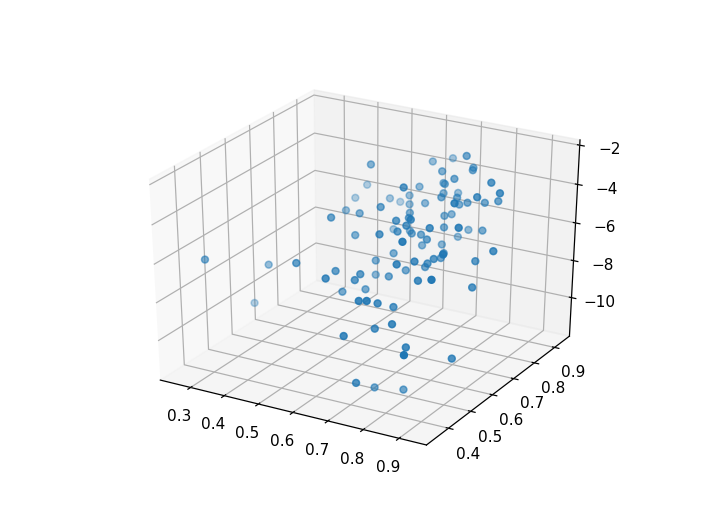

In [5]:
plt3d = plt.figure().gca(projection="3d")
plt3d.scatter(top_2017.danceability, top_2017.energy, top_2017.loudness)

In [7]:
dados_entrada = top_2017.loc[:,("danceability", "energy", "acousticness")]

In [8]:
three_means = cluster.MiniBatchKMeans(n_clusters=3)

In [9]:
three_means.fit(dados_entrada)

MiniBatchKMeans(batch_size=100, compute_labels=True, init='k-means++',
        init_size=None, max_iter=100, max_no_improvement=10, n_clusters=3,
        n_init=3, random_state=None, reassignment_ratio=0.01, tol=0.0,
        verbose=0)

In [10]:
saida = three_means.predict(dados_entrada)

In [11]:
saida

array([1, 2, 2, 2, 2, 0, 0, 2, 0, 0, 2, 2, 0, 0, 0, 2, 2, 2, 1, 2, 2, 2,
       1, 1, 2, 1, 2, 0, 1, 0, 1, 0, 2, 1, 2, 1, 0, 0, 0, 2, 0, 2, 0, 2,
       2, 1, 1, 0, 0, 0, 2, 0, 2, 2, 0, 2, 2, 0, 0, 2, 0, 2, 0, 2, 0, 1,
       2, 0, 2, 0, 2, 0, 0, 2, 2, 2, 1, 2, 0, 2, 1, 1, 0, 2, 2, 1, 0, 2,
       2, 2, 1, 0, 2, 2, 0, 2, 2, 1, 0, 2], dtype=int32)

In [12]:
conjunto = dados_entrada.copy()

In [13]:
conjunto["saida"] = saida

In [14]:
conjunto.head()

,danceability,energy,acousticness,saida
name,,,,
Shape of You,0.825,0.652,0.5810,1
Despacito - Remix,0.694,0.815,0.2290,2
Despacito (Featuring Daddy Yankee),0.660,0.786,0.2090,2
Something Just Like This,0.617,0.635,0.0498,2
I'm the One,0.609,0.668,0.0552,2


<IPython.core.display.Javascript object>


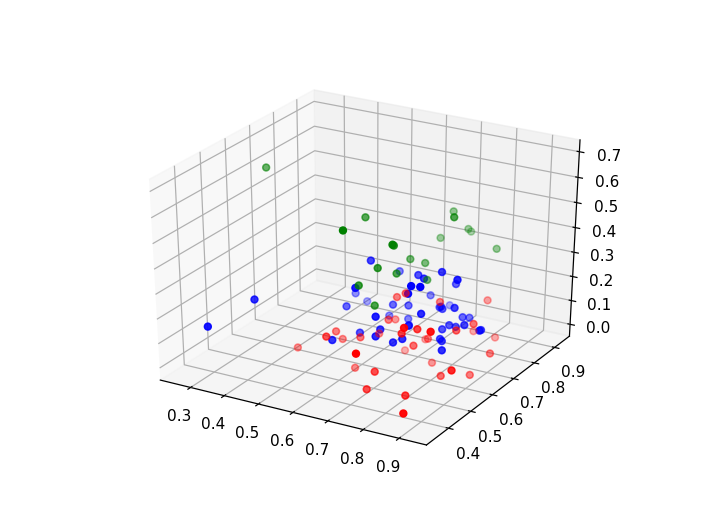

In [15]:
plt3d = plt.figure().gca(projection="3d")
grupo0 = conjunto[conjunto.saida==0]
grupo1 = conjunto[conjunto.saida==1]
grupo2 = conjunto[conjunto.saida==2]

plt3d.scatter(grupo0.danceability, grupo0.energy, grupo0.acousticness, color="r")
plt3d.scatter(grupo1.danceability, grupo1.energy, grupo1.acousticness, color="g")
plt3d.scatter(grupo2.danceability, grupo2.energy, grupo2.acousticness, color="b")

In [16]:
grupo0

,danceability,energy,acousticness,saida
name,,,,
HUMBLE.,0.904,0.611,0.000259,0
It Ain't Me (with Selena Gomez),0.640,0.533,0.119000,0
That's What I Like,0.853,0.560,0.013000,0
"I Don’t Wanna Live Forever (Fifty Shades Darker) - From ""Fifty Shades Darker (Original Motion Picture Soundtrack)""",0.735,0.451,0.063100,0
Stay (with Alessia Cara),0.679,0.634,0.232000,0
Attention,0.774,0.626,0.096900,0
Mask Off,0.833,0.434,0.010200,0
Scared to Be Lonely,0.584,0.540,0.089500,0
Symphony (feat. Zara Larsson),0.707,0.629,0.259000,0


In [17]:
grupo1

,danceability,energy,acousticness,saida
name,,,,
Shape of You,0.825,0.652,0.581,1
Rockabye (feat. Sean Paul & Anne-Marie),0.720,0.763,0.406,1
Say You Won't Let Go,0.358,0.557,0.695,1
There's Nothing Holdin' Me Back,0.857,0.800,0.381,1
Issues,0.706,0.427,0.413,1
Closer,0.748,0.524,0.414,1
I Feel It Coming,0.768,0.813,0.427,1
Slide,0.736,0.795,0.498,1
1-800-273-8255,0.629,0.572,0.570,1


In [18]:
grupo2

,danceability,energy,acousticness,saida
name,,,,
Despacito - Remix,0.694,0.815,0.22900,2
Despacito (Featuring Daddy Yankee),0.660,0.786,0.20900,2
Something Just Like This,0.617,0.635,0.04980,2
I'm the One,0.609,0.668,0.05520,2
Unforgettable,0.726,0.769,0.02930,2
XO TOUR Llif3,0.732,0.750,0.00264,2
Paris,0.653,0.658,0.02150,2
Congratulations,0.627,0.812,0.19800,2
Swalla (feat. Nicki Minaj & Ty Dolla $ign),0.696,0.817,0.07500,2
